In [1]:
from transformers import WhisperFeatureExtractor
import librosa
import matplotlib.pyplot as plt
import subprocess

In [2]:
def convert_opus_to_wav(opus_path, wav_path, path_to_ffmpeg):
    '''This function converts an opus file to a wav file.
    opus_path: path to the opus file
    wav_path: path to the wav file
    path_to_ffmpeg: path to the ffmpeg executable'''

    result = subprocess.run([f'{path_to_ffmpeg}', '-i', f'{opus_file}', '-vn', f'{wav_file}'])

    # Check the exit code
    if result.returncode == 0:
        print('Conversion successful')
    else:
        print('Conversion failed')

In [3]:
path = "/Users/bingyanghou/Desktop/COLX_585_trends/data/"
name = 'common_voice_en_18833718.opus'
opus_file = path  + name
wav_file = path  + name[:-5] + '.wav'
print(opus_file)
print(wav_file)
path_to_ffmpeg = '/Users/bingyanghou/Desktop/COLX_585_trends/data/ffmpeg'

/Users/bingyanghou/Desktop/COLX_585_trends/data/common_voice_en_18833718.opus
/Users/bingyanghou/Desktop/COLX_585_trends/data/common_voice_en_18833718.wav


In [4]:
convert_opus_to_wav(opus_file, wav_file, path_to_ffmpeg)

Conversion successful


ffmpeg version N-110189-ge1f691b2e8-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static

In [5]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

1.13.1
0.13.1


In [6]:
import io
import os
import tarfile
import tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset

waveform, sample_rate = torchaudio.load(wav_file)

In [7]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)
    
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

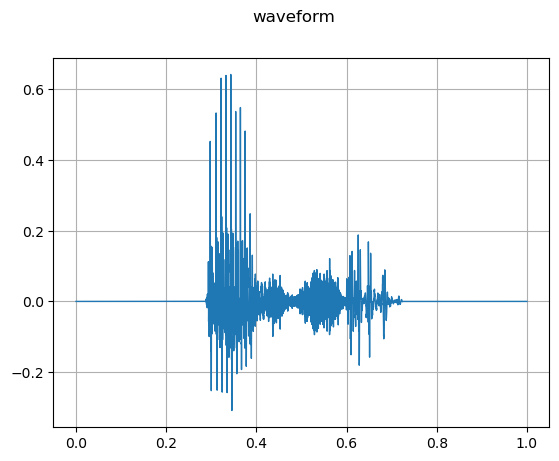

In [8]:
plot_waveform(waveform, sample_rate)

/opt/miniconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


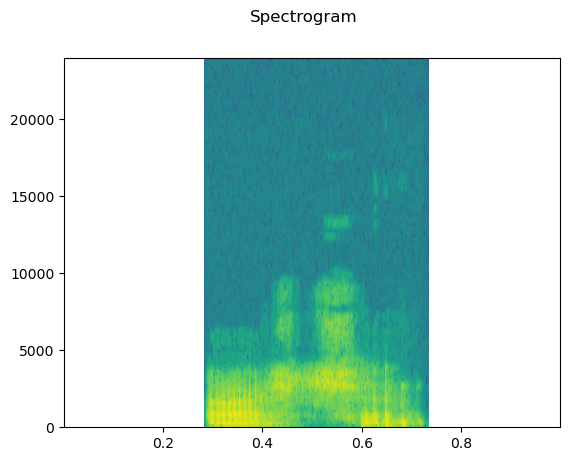

In [9]:
plot_specgram(waveform, sample_rate)